In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import randint

In [2]:
from utils.notebook_config import *
# Download latest version
file_path = "dataset/synthetic_coffee_health_10000.csv"

# Load the latest version
data = pd.read_csv(file_path)

data.head()

data.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [3]:
#start with the visualization
#smoking and alcohol are boolean
#Gender Country and Sleep quality must be converted to numerals
"""Country could be hard to convert maybe we just sort them by GDP and give them descending numbers based on that or we use an index measuring health care. Coffee intake and estimated caffeine is redundent """
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [4]:
from IPython.display import display

display(data['Country'].value_counts())
display(data['Gender'].value_counts())
display(data['Sleep_Quality'].value_counts())
display(data['Health_Issues'].value_counts())
display(data['Occupation'].value_counts())

Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Belgium        497
Australia      497
Germany        497
Netherlands    494
Spain          486
Mexico         483
Japan          469
Brazil         456
USA            448
Name: count, dtype: int64

Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64

Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64

Health_Issues
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64

Occupation
Office        2073
Other         2038
Student       1968
Healthcare    1964
Service       1957
Name: count, dtype: int64

In [5]:
data[('Country_encoded')], country_categories= pd.factorize(data['Country'])
data['Gender_encoded'], gender_categories = pd.factorize(data['Gender'])
data['Sleep_encoded'], sleep_categories = pd.factorize(data['Sleep_Quality'])
data['Health_encoded'], health_categories = pd.factorize(data['Health_Issues'])
data['Occupation_encoded'], occupation_categories = pd.factorize(data['Occupation'])

/var/folders/rq/sf33k5wx73bcj8m51c786sc80000gn/T/ipykernel_62352/2198168833.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


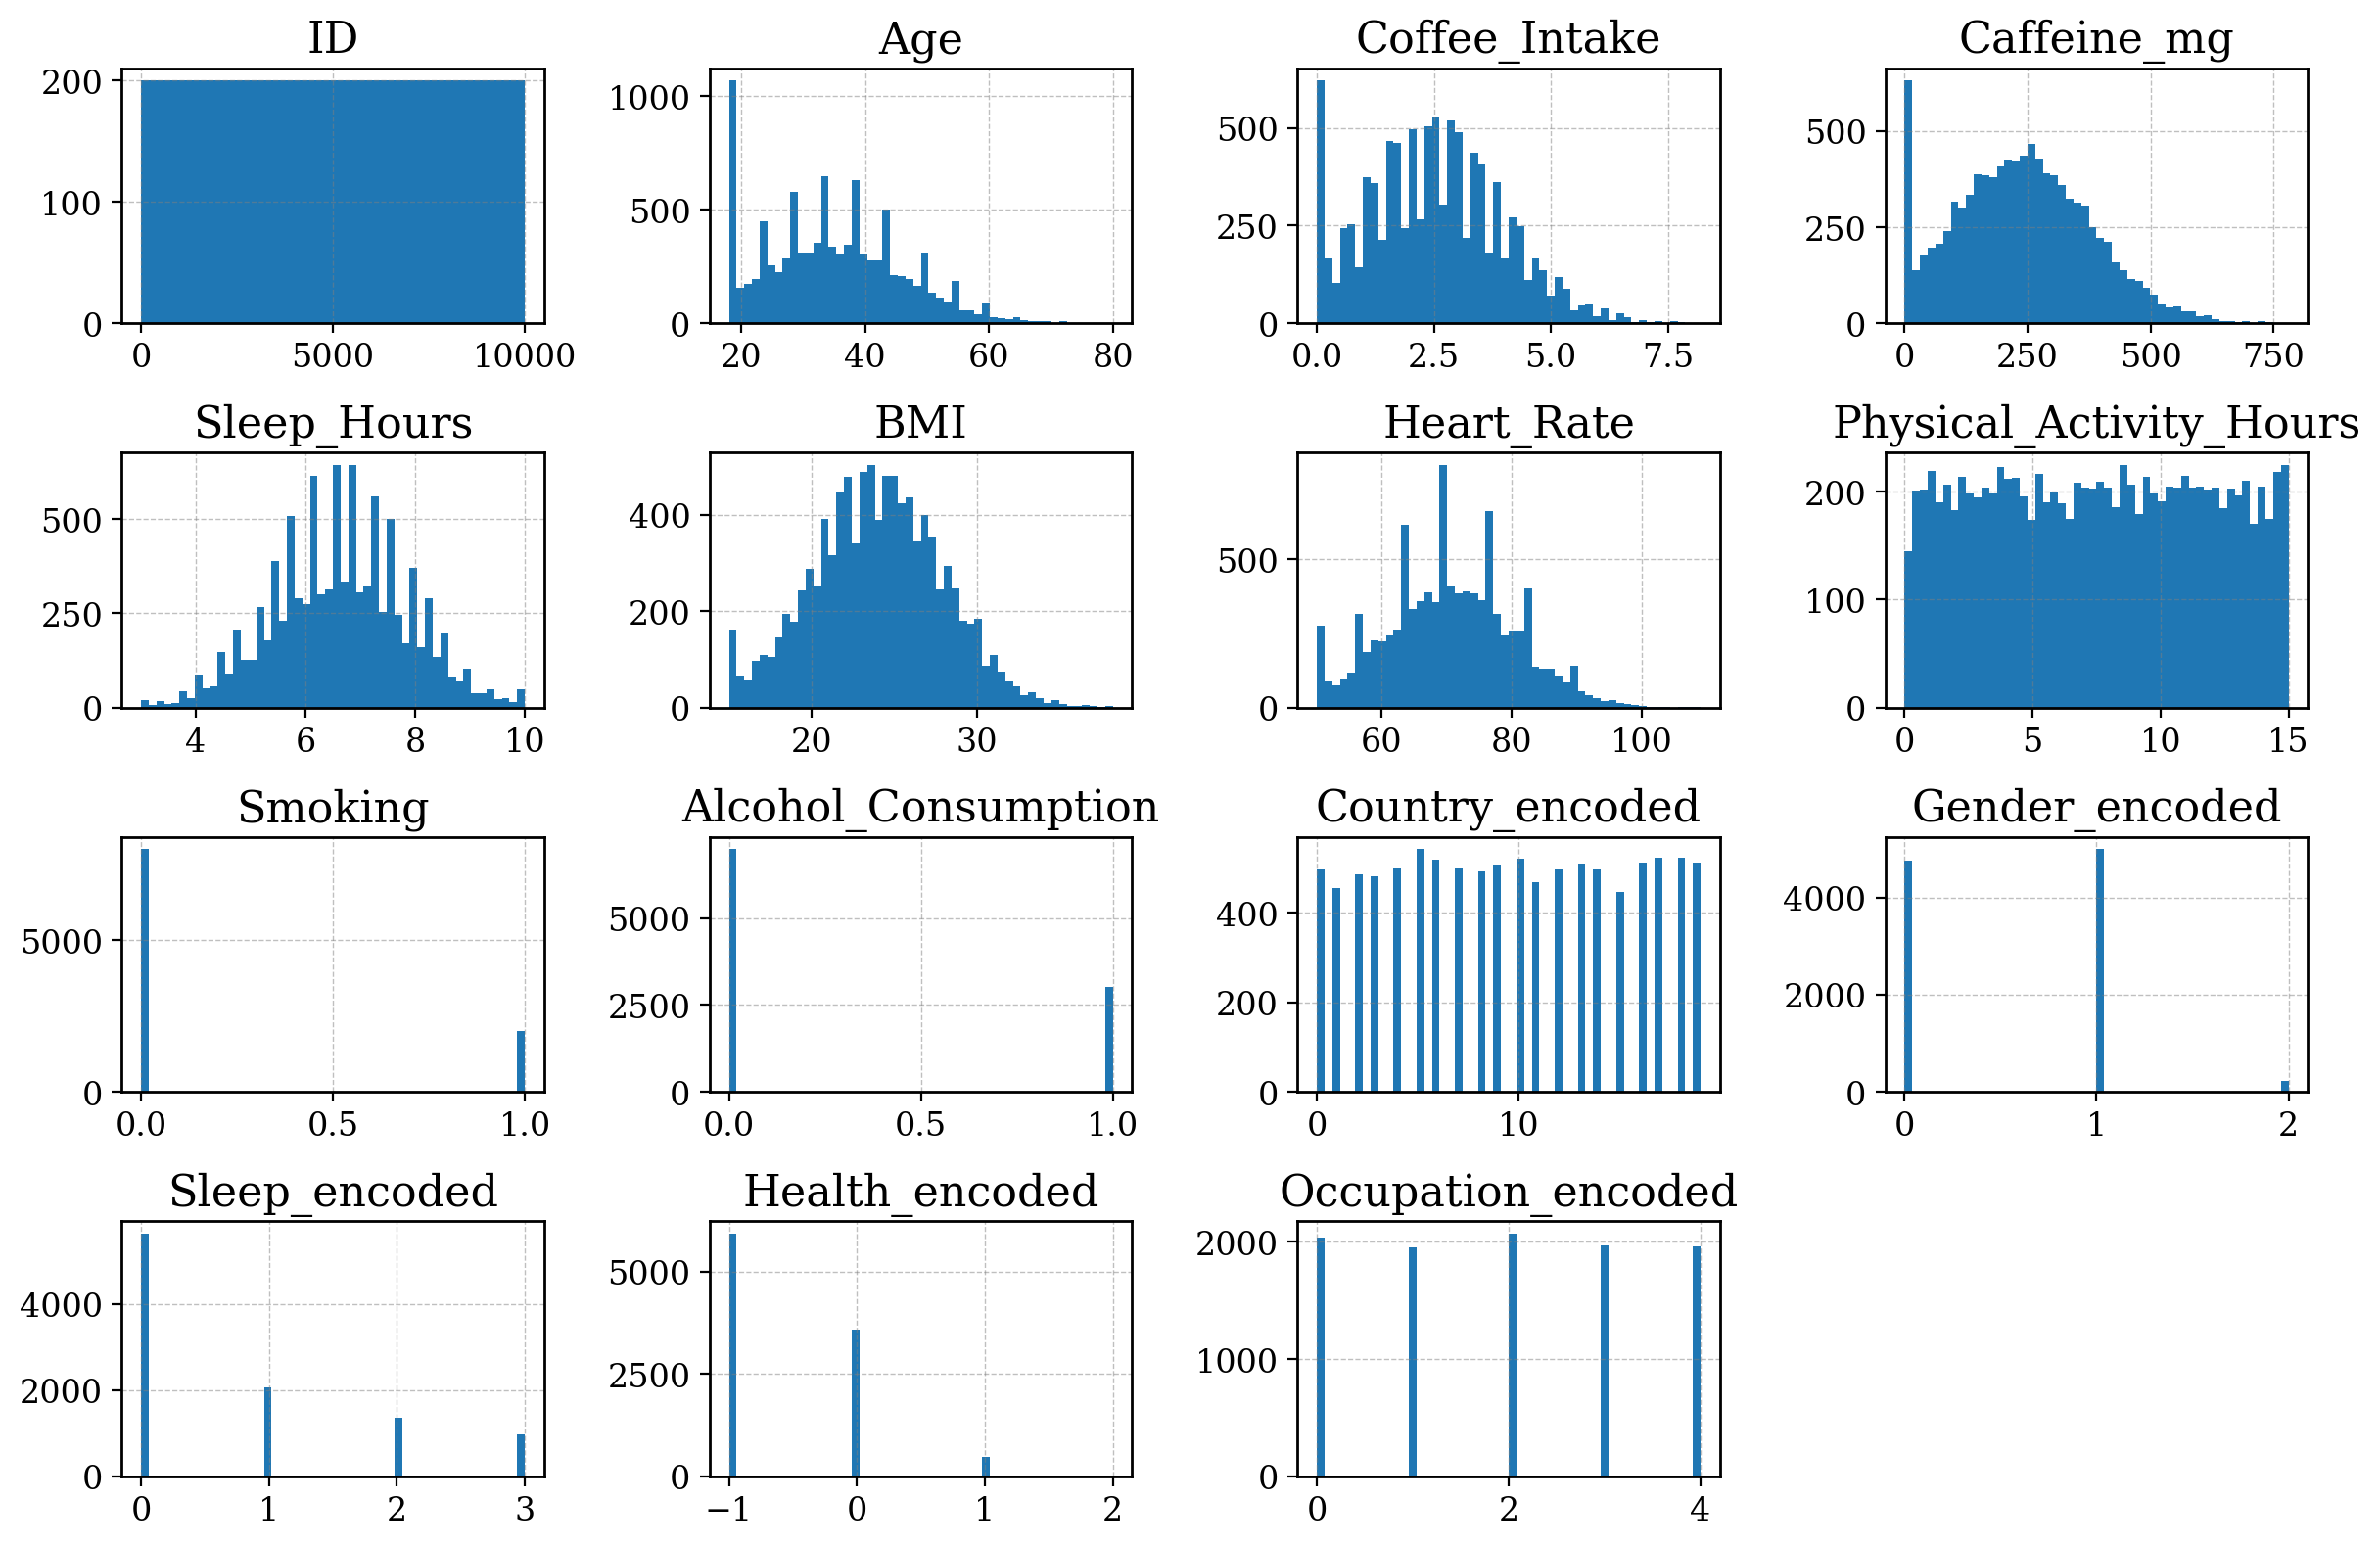

In [6]:
data.hist(bins=50, figsize=(12, 8))
plt.tight_layout()

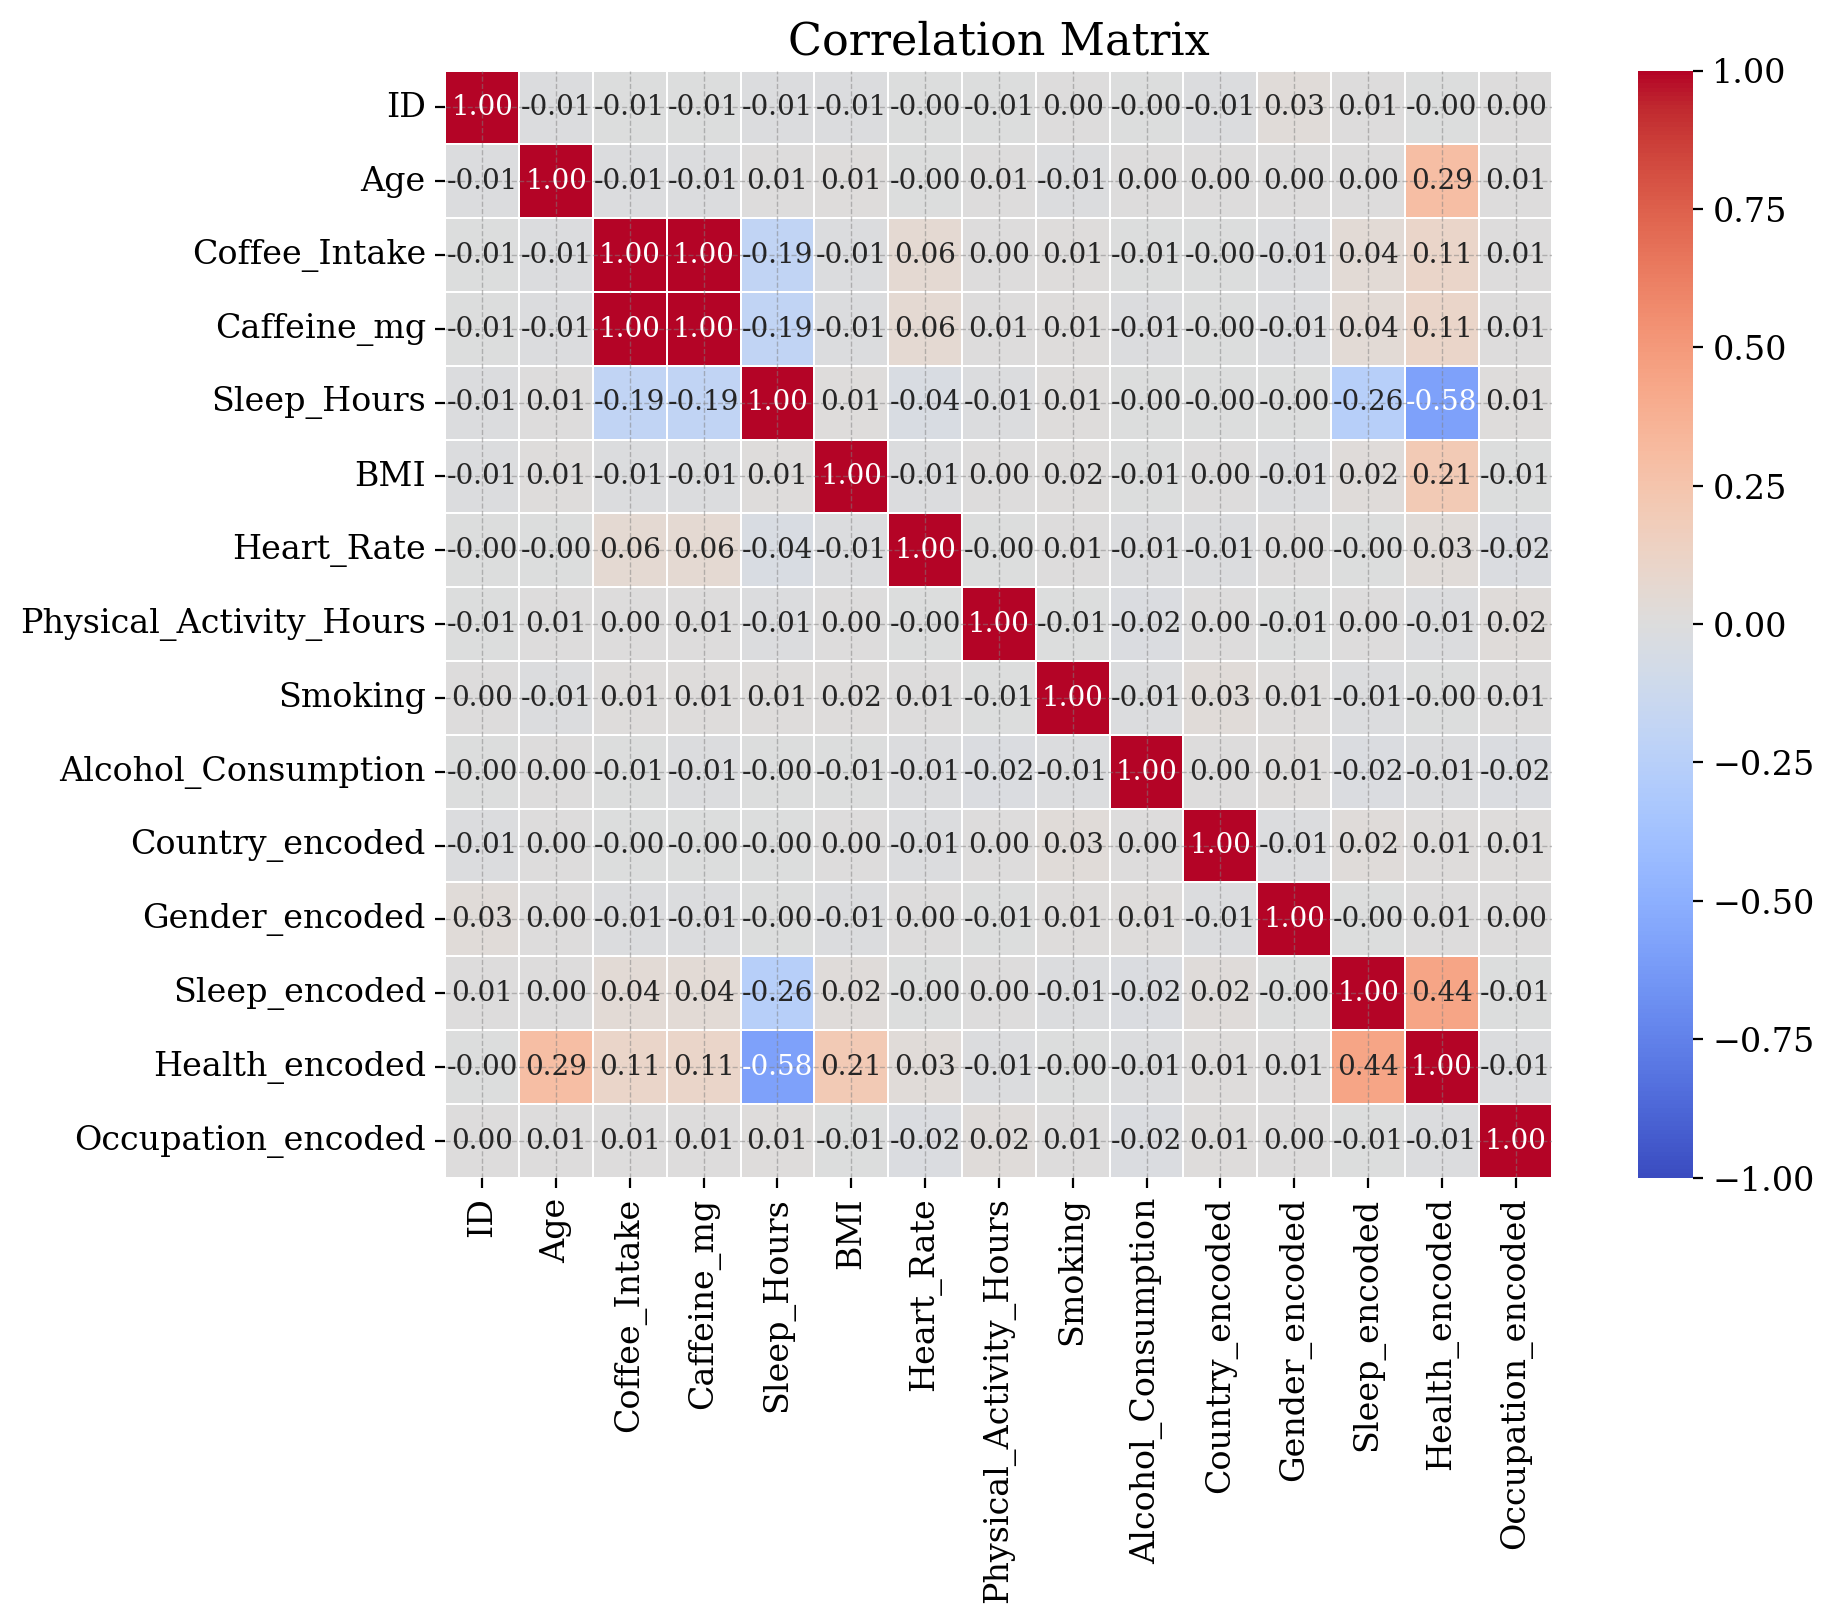

In [7]:
corr = data.corr(numeric_only=True)

# Show heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            annot=True, fmt=".2f",
            vmax=1.0, vmin=-1.0,
            linewidths=0.1,
            cmap="coolwarm",
            square=True, cbar=True)
plt.title("Correlation Matrix")
#plt.tight_layout()
plt.show()

Based on the correlation matrix, we can drop the features "Occupation", "Gender", "Country", "Alcohol", "Smoking" and "Physical Activity", since they are fully uncorrelated with all the other other features except themselve.

Furthermore, "Coffee" seems to be equivalent to "Caffeine intake", no surprise, so we can drop one of them as well.

Note: Between "Country" and "Smoking" seems to be a slight correlation, but nothing note worthy.

Main Target: "Health" (aka Classification problem)

In [ ]:
from sklearn.preprocessing import LabelEncoder


train_df, val_df = train_test_split(data, test_size=0.3, random_state=42)


# Apply label encoding to categorical column
label_encoder = LabelEncoder()
train_df["Gender"] = label_encoder.fit_transform(train_df["Gender"])
val_df["Gender"]   = label_encoder.transform(val_df["Gender"])

train_df["Country"] = label_encoder.fit_transform(train_df["Country"])
val_df["Country"]   = label_encoder.transform(val_df["Country"])

train_df["Sleep_Quality"] = label_encoder.fit_transform(train_df["Sleep_Quality"])
val_df["Sleep_Quality"]   = label_encoder.transform(val_df["Sleep_Quality"])

train_df["Stress_Level"] = label_encoder.fit_transform(train_df["Stress_Level"])
val_df["Stress_Level"]   = label_encoder.transform(val_df["Stress_Level"])

train_df["Health_Issues"] = label_encoder.fit_transform(train_df["Health_Issues"])
val_df["Health_Issues"]   = label_encoder.transform(val_df["Health_Issues"])

train_df["Occupation"] = label_encoder.fit_transform(train_df["Occupation"])
val_df["Occupation"]   = label_encoder.transform(val_df["Occupation"])

# Use the entire features for X_train and X_val
X_train = train_df.drop(columns=["Health_Issues"]).values  # Exclude "Gain" from training features
y_train = train_df["Health_Issues"].values  # Target variable

X_val = val_df.drop(columns=["Health_Issues"]).values  # Exclude "Gain" from validation features
y_val = val_df["Health_Issues"].values  # Target variable

Best Parameters from RandomizedSearchCV: {'full_dt_regressor__max_depth': 8, 'full_dt_regressor__min_samples_leaf': 4, 'full_dt_regressor__min_samples_split': 6}
Decision Tree regression metrics:
MSE: 0.0000
MAE: 0.0000
SSR: 0.0000
R2-score: 1.0000

Cross-Validated R2-Scores: [1.         1.         1.         0.99717322 1.         1.
 1.         1.         1.         1.        ]
Average Cross-Validated R2: 0.9997


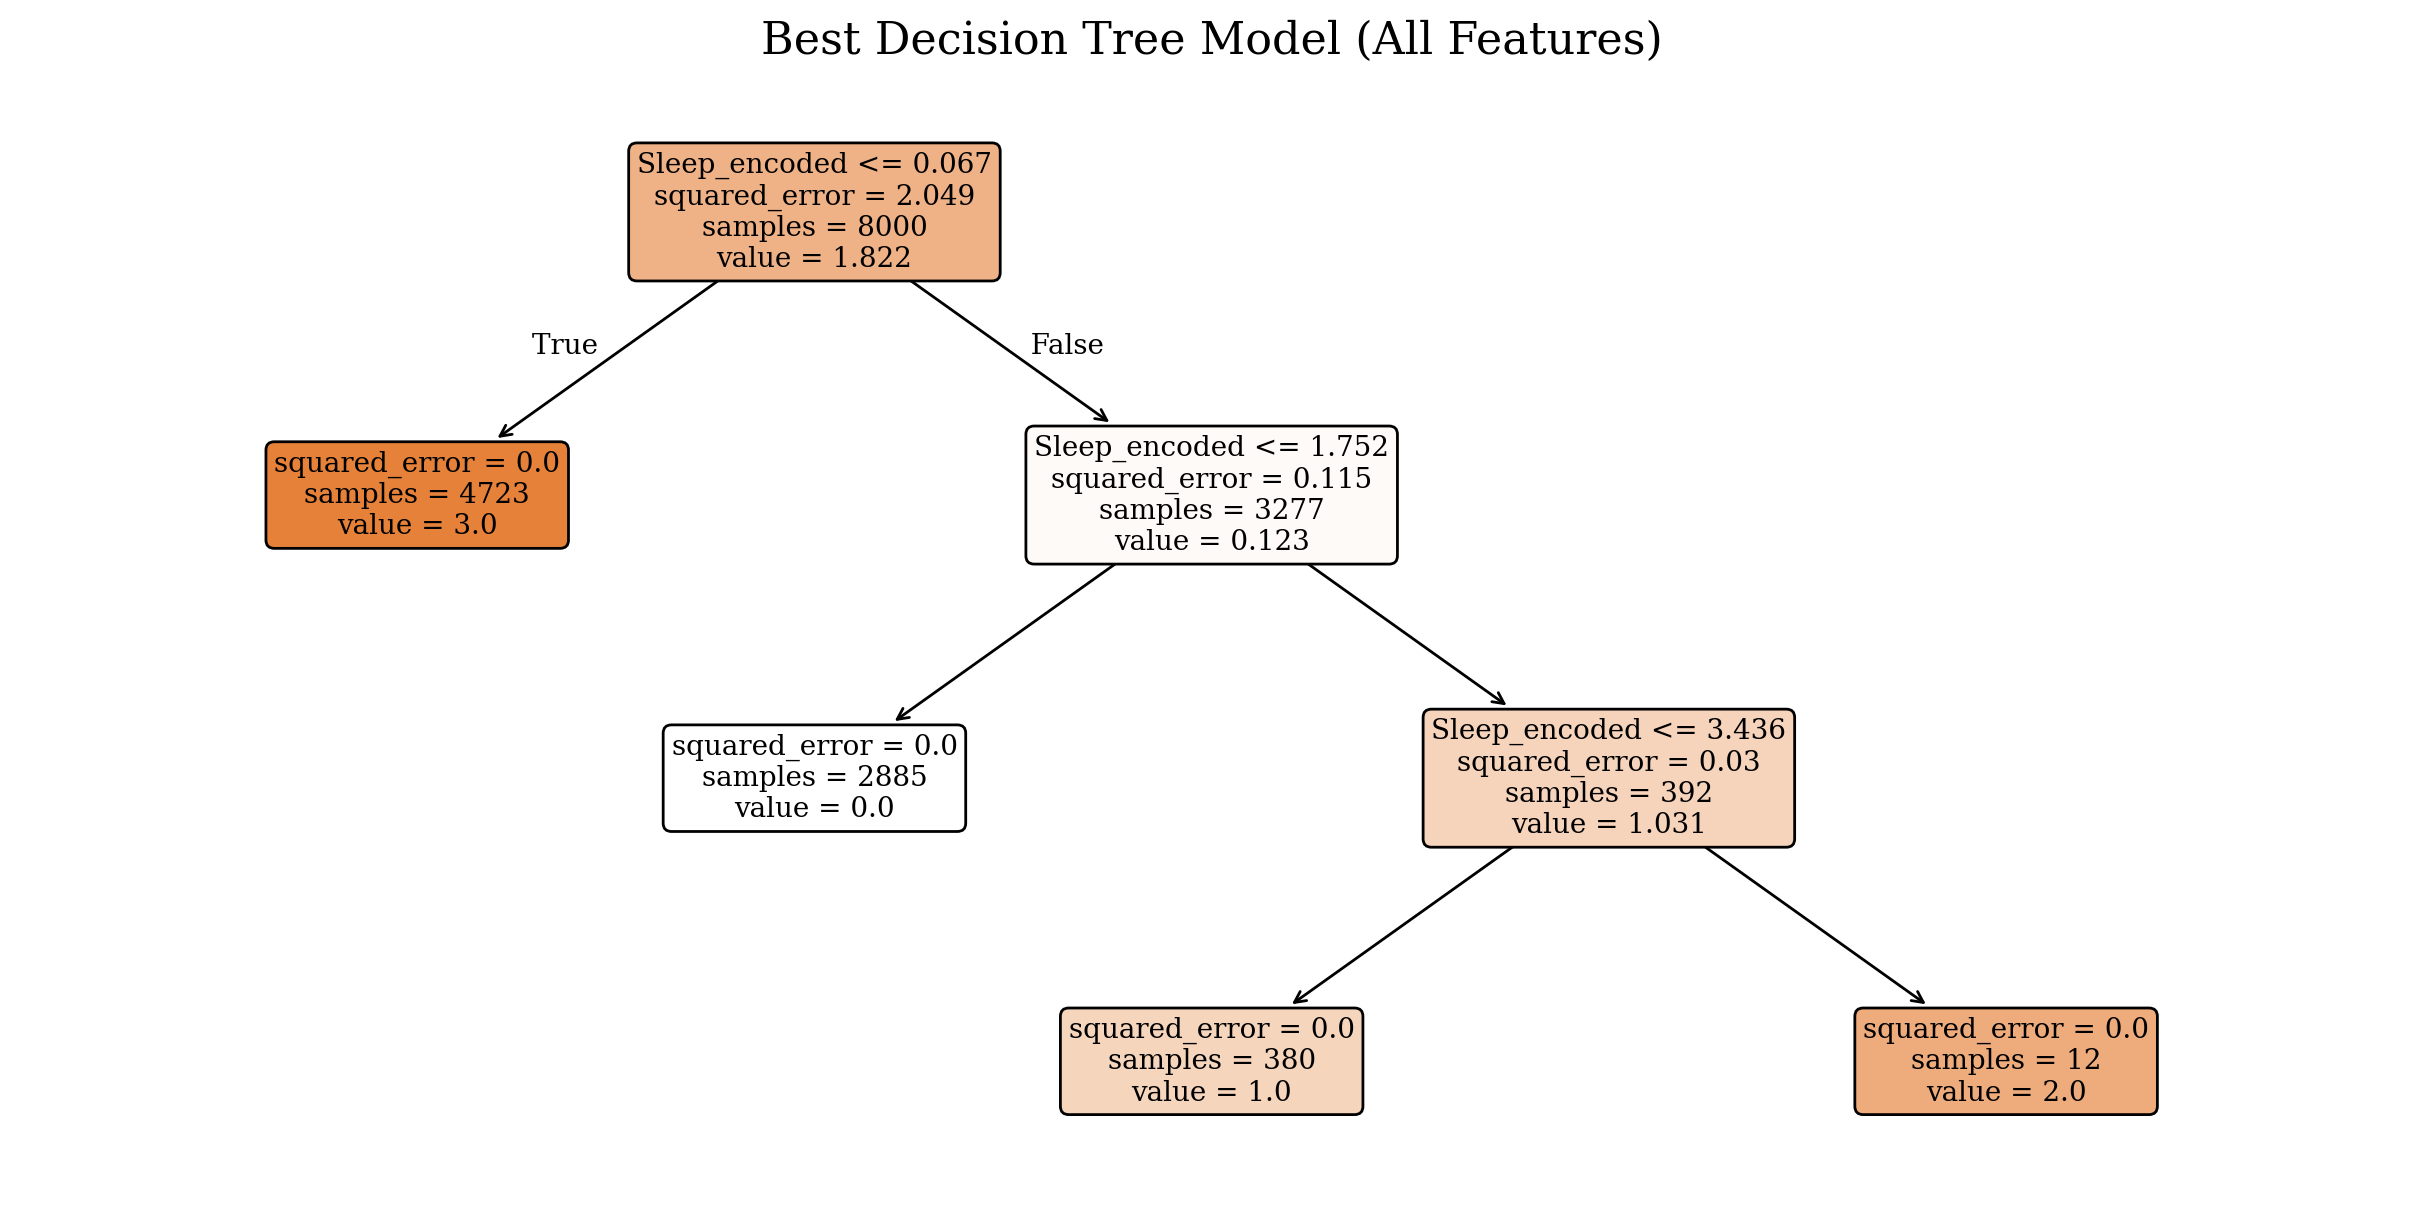

In [14]:
# Build pipeline
new_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('full_dt_regressor', DecisionTreeRegressor(random_state=42))  # Train Decision Tree Regressor
])

# Hyperparameter search space
param_distributions = {
    'full_dt_regressor__max_depth'        : randint(2, 10),
    'full_dt_regressor__min_samples_split': randint(2, 10),
    'full_dt_regressor__min_samples_leaf' : randint(1, 10)
}

# Randomized search with cross-validation
search = RandomizedSearchCV(
    estimator=new_pipeline,   # Use the new pipeline
    param_distributions=param_distributions, # Hyperparameter search space
    n_iter       = 30,    # Number of iterations for random search
    cv           = 10,     # Cross-validation folds
    scoring      = 'r2',  # Scoring metric for evaluation
    n_jobs       = -1,    # Use all available CPU cores
    random_state = 42,    # Random state for reproducibility
)

# Fit search
search.fit(X_train, y_train)

# Best model
best_model = search.best_estimator_

# Predict on validation set
y_pred = best_model.predict(X_val)

# Evaluation metrics
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
ssr = np.sum((y_val - y_pred) ** 2)
r2 = r2_score(y_val, y_pred)

print("Best Parameters from RandomizedSearchCV:", search.best_params_)
print("Decision Tree regression metrics:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"SSR: {ssr:.4f}")
print(f"R2-score: {r2:.4f}")

# Cross-validation with best model
cv_scores = cross_val_score(best_model, X_val, y_val, cv=10, scoring='r2')
print(f"\nCross-Validated R2-Scores: {cv_scores}")
print(f"Average Cross-Validated R2: {cv_scores.mean():.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(best_model.named_steps['full_dt_regressor'], feature_names=train_df.columns,
          filled=True,
          rounded=True,
          max_depth=10,  # You can remove or increase this if the tree is shallow
          fontsize=10)
plt.title("Best Decision Tree Model (All Features)")
plt.show()